                                                     US AIRLINE SENTIMENT ANALYSIS

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

In [6]:
df=df.drop(["tweet_id","airline_sentiment_confidence","negativereason_confidence","retweet_count","tweet_created","name","airline_sentiment_gold","negativereason_gold","tweet_coord","tweet_location","user_timezone"],axis=1)

In [7]:
df.isnull().sum()

airline_sentiment       0
negativereason       5462
airline                 0
text                    0
dtype: int64

In [8]:
df.negativereason.unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [9]:
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Filling missing values

In [10]:
df.loc[df.airline=="Delta","negativereason"]=df.loc[df.airline=="Delta","negativereason"].fillna("Late Flight")
df["negativereason"]=df["negativereason"].fillna("Customer Service Issue")


In [11]:
df.isnull().sum()

airline_sentiment    0
negativereason       0
airline              0
text                 0
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


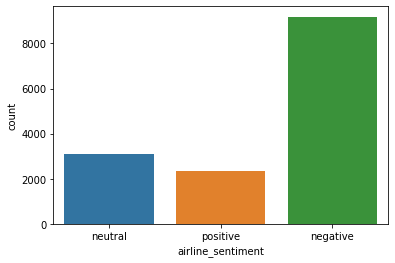

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df["airline_sentiment"])

Negative reviews are more higher

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


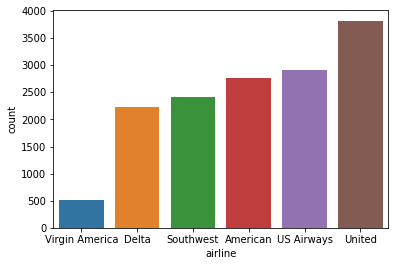

In [13]:
sns.countplot(df["airline"],order=df["airline"].value_counts(ascending=True).index)

<Figure size 1080x720 with 0 Axes>

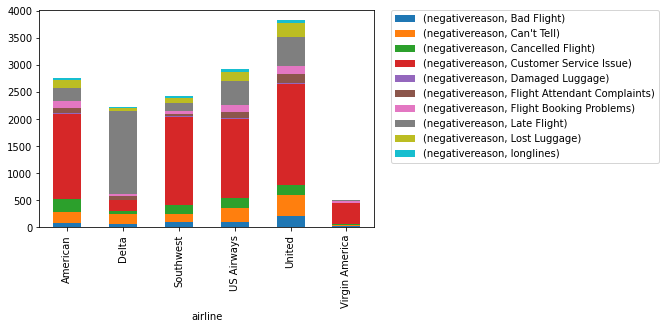

In [14]:
plt.figure(figsize=(15,10))

pd.DataFrame(df.groupby("airline")["negativereason"].value_counts()).unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

"Customer Service Issue" are major issue raised in all airline

<Figure size 1080x720 with 0 Axes>

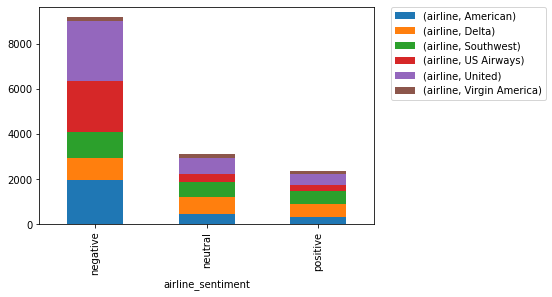

In [15]:
plt.figure(figsize=(15,10))
pd.DataFrame(df.groupby('airline_sentiment')['airline'].value_counts()).unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)


Negative reviews are more higher in are airline specifically in United,US Airways , America

In [16]:
df1=df.copy()

Removing Punctuations

In [17]:
df1["text"]=df1["text"].str.replace("[^a-zA-Z]"," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [18]:
df1["text"]=[j.lower() for j in df1["text"]]

Removing stopwords

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def sw_removal(i):
   word=word_tokenize(i)
   sw=" ".join([j for j in word if (j not in stop_words) and (len(j)>2)])
   return sw
df1["text"]=[sw_removal(j) for j in df1["text"]]   

Lemmatization

In [21]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [22]:
def pos_tag(k):    
    if k.startswith('J'):
        return wordnet.ADJ
    elif k.startswith('V'):
        return wordnet.VERB
    elif k.startswith('N'):
        return wordnet.NOUN
    elif k.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lem(x):
  pos=nltk.pos_tag(nltk.word_tokenize(x))
  k1=[[k[0],pos_tag(k[1])] for k in pos]
  lemmatization=[]
  for word,tag in  k1:
    if tag is None:
      lemmatization.append(word)
    else:
      lemmatization.append(lemmatizer.lemmatize(word,tag))
  return(" ".join(lemmatization) )     
     
df1["text"]=[lem(x) for x in df1["text"]]    
  

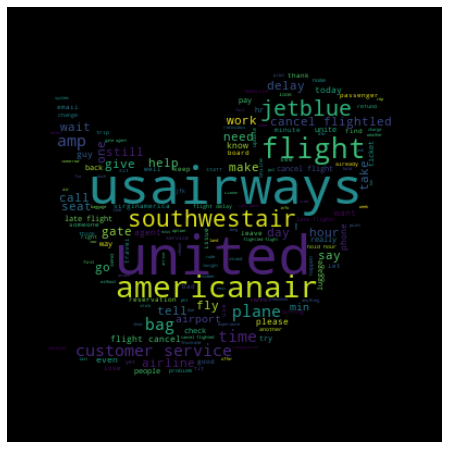

In [23]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
word_cloud_df1 = df1.loc[df1['airline_sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df1['text']])


mask = np.array(Image.open("/content/377674.png"))
wordcloud = WordCloud( background_color="black", max_words=1000, mask=mask).generate(all_words)
# create twitter image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

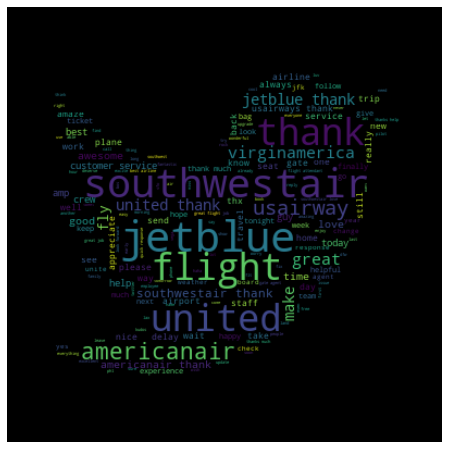

In [24]:
word_cloud_df1 = df1.loc[df1['airline_sentiment'] == 'positive',:]
all_words = ' '.join([text for text in word_cloud_df1['text']])


mask = np.array(Image.open("/content/377674.png"))
wordcloud = WordCloud( background_color="black", max_words=1000, mask=mask).generate(all_words)
# create twitter image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

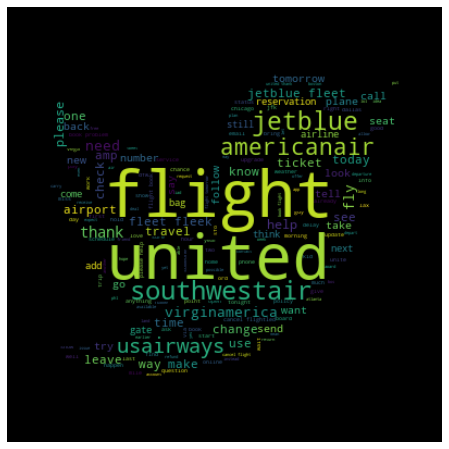

In [25]:
word_cloud_df1 = df1.loc[df1['airline_sentiment'] == 'neutral',:]
all_words = ' '.join([text for text in word_cloud_df1['text']])


mask = np.array(Image.open("/content/377674.png"))
wordcloud = WordCloud( background_color="black", max_words=1000, mask=mask).generate(all_words)
# create twitter image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Bag of words

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
df1.text = tfidf.fit_transform(df1.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
x = df1.text.toarray()
y = df1.airline_sentiment


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


Model

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7954234972677595

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
  


0.6813524590163934

In [31]:
y_pred=dt.predict(x_test)
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n    negative       0.70      0.92      0.80      1819\n     neutral       0.47      0.17      0.25       615\n    positive       0.66      0.46      0.54       494\n\n    accuracy                           0.68      2928\n   macro avg       0.61      0.51      0.53      2928\nweighted avg       0.65      0.68      0.64      2928\n'

The data is IMBALANCED so the precision ,f1-score and recall is lower for neutral and positive

In [32]:
y_pred=dt.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred,multi_class="ovr"))

0.6485308271462372


BALANCING THE DATA

In [33]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size = 0.2)


In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8491457651762996

In [36]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8298800436205016

In [38]:
y_pred=lr.predict(x_test)
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n    negative       0.85      0.82      0.83      1830\n     neutral       0.80      0.84      0.82      1848\n    positive       0.90      0.89      0.90      1824\n\n    accuracy                           0.85      5502\n   macro avg       0.85      0.85      0.85      5502\nweighted avg       0.85      0.85      0.85      5502\n'

In [40]:
y_pred=lr.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred,multi_class="ovr"))


0.9547633296224965


After balancing the data the "f1-score","precision","recall" all are increased 

The best model for this sentiment analysis is LOGISTIC REGRESSION

Prediction

In [43]:
tweet = [["it was the \worst flight i have ever been ?"],["I don't think I'll ever use American Airlines any more"],["it is amazing"]]
for i in tweet:
  x=tfidf.transform(i).toarray()
  y_pred=lr.predict(x)
  print(y_pred)

['negative']
['negative']
['positive']
